In [1]:
!head -n 10 names/yob1880.txt

In [2]:
import pandas as pd

In [3]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [6]:
years = range(1880, 2018)

In [7]:
pieces = []
columns = ['name', 'sex', 'births']

In [8]:
for year in years:
    path = 'names/yob%d.txt' %year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

In [9]:
names = pd.concat(pieces, ignore_index = True)

In [10]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [11]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [12]:
total_births.tail()

sex,F,M
year,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


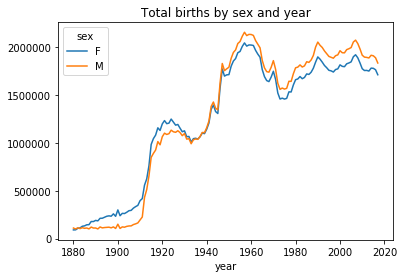

In [13]:
%matplotlib inline
total_births.plot(kind='line', title='Total births by sex and year')

In [14]:
# 연도와 성별로 그룹화하고 각 그룹에 prop열 추가해 이름별 비율을 나타냄
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [15]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [16]:
import numpy as np

In [17]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [18]:
# 각 연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [19]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### 이름 유행 분석

In [20]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [21]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [22]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1880 to 2017
Columns: 7134 entries, Aaden to Zyaire
dtypes: float64(7134)
memory usage: 7.5 MB


In [23]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f894a476a58>,
      dtype=object)

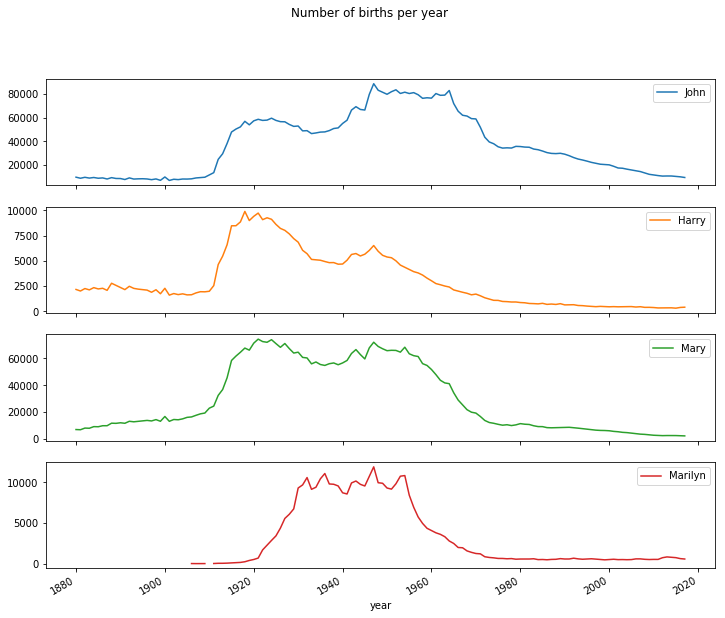

In [24]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of births per year")

### 이름 다양성 파악

In [25]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

상위 1000개의 이름이 전체 중 차지하는 비율,
최근에는 80%까지 하락했음을 알 수 있다.

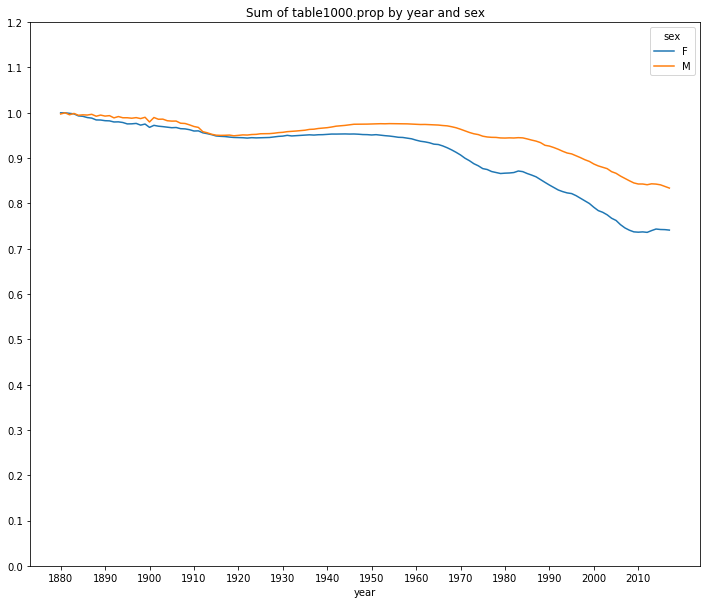

In [26]:
table.plot(title='Sum of table1000.prop by year and sex',figsize=(12,10), yticks=np.linspace(0,1.2,13), xticks=range(1880, 2020, 10))

### 2010년 인기 있는 이름 순으로 정렬했을 때 전체의 50% 지점까지 등장하는 이름의 개수

In [27]:
df = boys[boys.year == 2010]

In [28]:
df

,name,sex,births,year,prop
260877,Jacob,M,22117,2010,0.011544
260878,Ethan,M,18000,2010,0.009395
260879,Michael,M,17342,2010,0.009051
260880,Jayden,M,17171,2010,0.008962
260881,William,M,17048,2010,0.008898
260882,Alexander,M,16752,2010,0.008743
260883,Noah,M,16447,2010,0.008584
260884,Daniel,M,15836,2010,0.008265
260885,Aiden,M,15535,2010,0.008108
260886,Anthony,M,15487,2010,0.008083


In [29]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [30]:
prop_cumsum[:10]

260877    0.011544
260878    0.020939
260879    0.029990
260880    0.038952
260881    0.047850
260882    0.056594
260883    0.065178
260884    0.073443
260885    0.081552
260886    0.089635
Name: prop, dtype: float64

In [31]:
# 50% 지점 값의 index
prop_cumsum.values.searchsorted(0.5)

116

50% 지점까지 2010년에는 117개, 1900년에는 25개의 이름이 있음을 알 수 있다.

In [32]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25])

In [33]:
# 함수로 작성
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [34]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [35]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


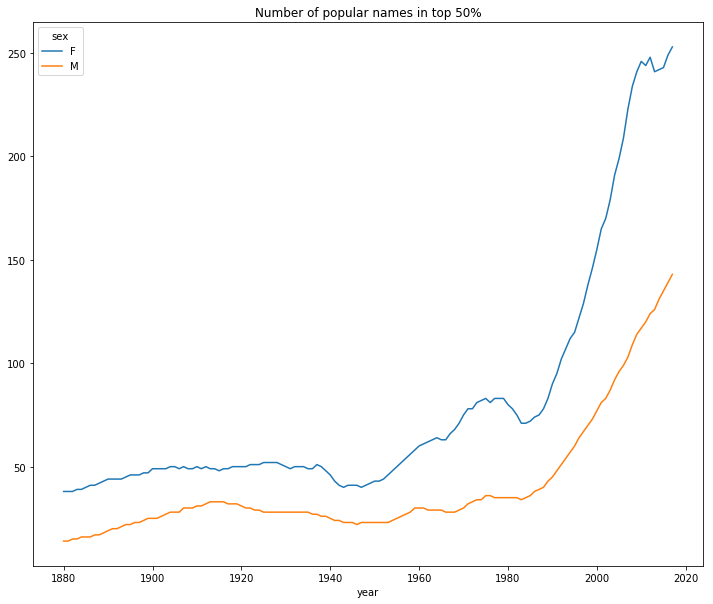

In [36]:
diversity.plot(title="Number of popular names in top 50%", figsize=(12,10))

### '마지막 글자'의 변화

In [37]:
# name 열에서 마지막 글자를 추출한다
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [38]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [39]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [40]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691250.0  676646.0    977.0    5212.0   28859.0
b                 NaN     694.0     455.0    411.0    3914.0   39264.0
c                 5.0      49.0     955.0    482.0   15460.0   23341.0
d              6751.0    3730.0    2640.0  22113.0  262136.0   44817.0
e            133600.0  435043.0  316665.0  28665.0  178785.0  130228.0

In [41]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022018.0
     2010    1774758.0
M    1910     194213.0
     1960    2132359.0
     2010    1915942.0
dtype: float64

In [42]:
# 전체 출생수로 정규화
letter_prop = subtable / subtable.sum().astype(float)

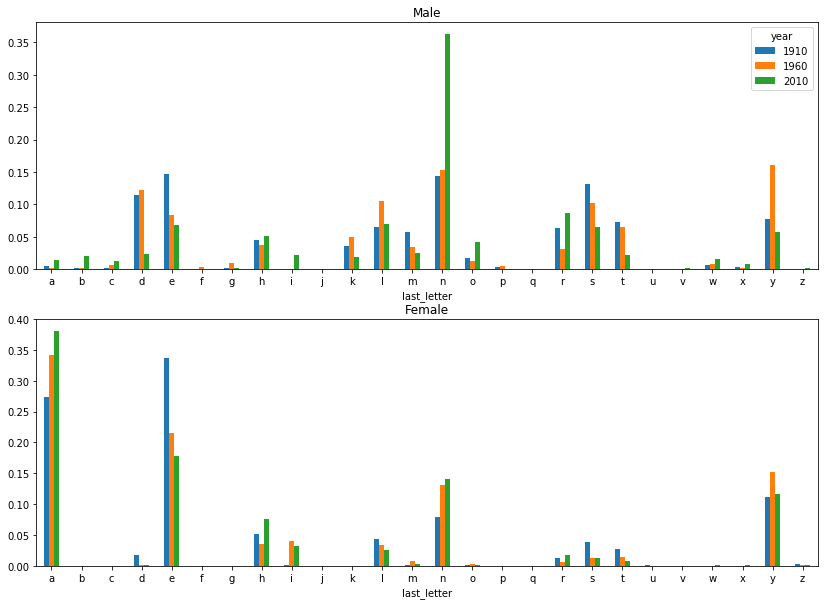

In [43]:
import matplotlib.pyplot as plt
fig , axes = plt.subplots(2, 1, figsize=(14, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

1960년 이후에 'n'은 급증, 'd'와 'y'는 급락했음을 알 수 있음

In [44]:
letter_prop = table / table.sum().astype(float)

In [45]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

/home/nakxx/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [46]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086122,0.149927,0.080408


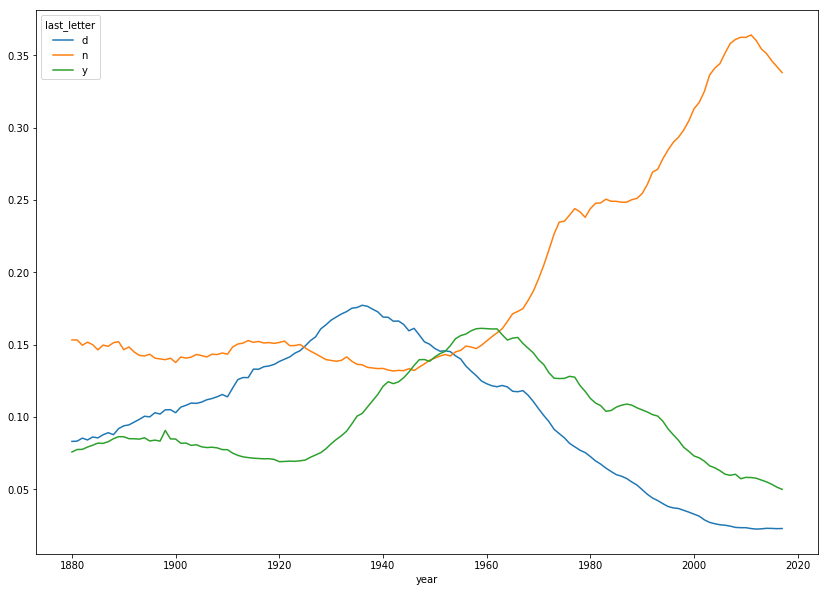

In [47]:
dny_ts.plot(figsize=(14, 10))

### 남자 이름과 여자 이름이 흐름에 따라 바뀐 경우

In [48]:
all_names = top1000.name.unique()

In [49]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [50]:
lesley_like = all_names[mask]

In [51]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [52]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [53]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    377561
Lesly      11432
Name: births, dtype: int64

In [54]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [55]:
table = table.div(table.sum(1), axis=0)

In [56]:
table.tail()

sex,F,M
year,,
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN


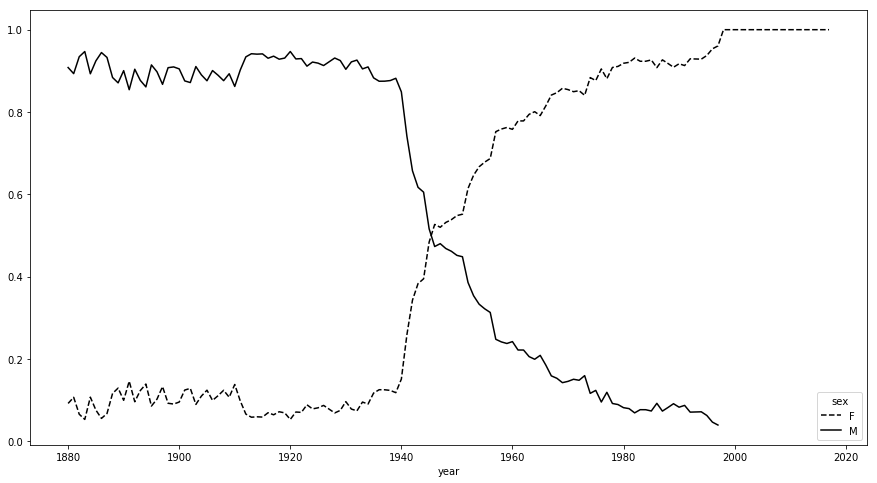

In [57]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(15, 8))